In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

odeint solves first-order ordinary differential equations of the form:
    
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t) $$

Lets consider a simple example where $f(y, t) = - k y$    

(analytically:  $y(t) = y_0 e^{-k t}$ )

In [7]:
k = 0.1
y0 = 200

t = np.linspace(0, 50, 50)

y = odeint(lambda y, t: -k*y, y0, t)


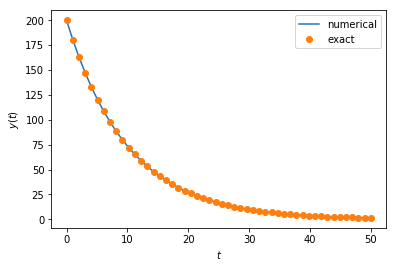

In [14]:
##let's compare the exact and numerical results
fig, ax=plt.subplots()
ax.plot(t, y, label='numerical')
ax.plot(t, y0*np.exp(-k*t), 'o', label='exact')
ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.legend()
plt.show()


For coupled, or higher-order ODEs?

odeint takes a tuple of y_0, returns tuples for each time step, and requires a function that gives a tuple return...

For example: the Harmonic Oscillator $ \frac{\mathrm{d}^2 y}{\mathrm{d} t^2} = - \omega^2 y$ is a second-order ODE, but can be written as a pair of coupled 1st order ODES

$$ \frac{\mathrm{d} y_1}{\mathrm{d} t} = y_2 $$

$$ \frac{\mathrm{d} y_2}{\mathrm{d} t} =  - \omega^2 y_1$$

where $y_1=y$ and $y_2 = \frac{\mathrm{d}y}{\mathrm{d}t}$

In [26]:
omega = 1

y0 = 3, 0                      #i.e y1(0) = 3, y2(0) = 0

t=np.linspace(0, 20, 100)

def dydt(y, t, omega):
    y1, y2 = y                  # unpack the tuple
    dy1dt = y2
    dy2dt = -omega**2 * y1
    return dy1dt, dy2dt         # return a tuple of values

y1, y2 = odeint(dydt, y0, t, args=(omega,)).T   

#why the T? easiest way to get lists of y1, y2 and not tuples for each time step!

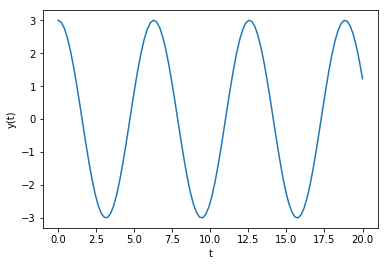

In [24]:
fig2, ax = plt.subplots()
ax.plot(t, y1)
ax.set_ylabel('y(t)')
ax.set_xlabel('t')
plt.show()